In [1]:
from base import BasePlotter, np, plt

from PIL import Image

# Export figures to Folder
figures_path = "../TFG_latex/Figures/"

### Defining of Functions

#### Spherical Surfaces

In [2]:
def spherical_grid(θ_range, φ_range=[0, 2*np.pi]):
    'Parametric grid for hemisphere (aligned with Y-axis)'
    num_points = 100
    θ = np.linspace(*θ_range, num_points)
    φ = np.linspace(*φ_range, num_points)
    θ, φ = np.meshgrid(θ, φ)
    return θ, φ

def spherical_to_cartesian(R, θ, φ):
    '''Convert spherical coordinates to Cartesian coordinates.'''
    x = R * np.sin(θ) * np.cos(φ)
    y = R * np.cos(θ)  # Primary axis
    z = R * np.sin(θ) * np.sin(φ)
    return x, y, z

def plot_theta_sphere(ax, R, θmax, **kwargs):
    '''Generate a spherical surface.'''
    θ, φ = spherical_grid([0, θmax])
    x, y, z = spherical_to_cartesian(R, θ, φ)
    ax.plot_surface(x, y, z, **kwargs)

def plot_7_8ths_sphere(ax, R, **kwargs):
    '''Generates 7/8ths´of a sphere.'''
    # 3/4 hemisphere
    θ, φ = spherical_grid([0, np.pi], [np.pi/2, 2*np.pi])
    x, y, z = spherical_to_cartesian(R, θ, φ)
    ax.plot_surface(x, y, z, **kwargs)
    # 1/4 hemisphere
    θ, φ = spherical_grid([0, np.pi/2], [0, np.pi/2])
    x, y, z = spherical_to_cartesian(R, θ, φ)
    ax.plot_surface(x, y, z, **kwargs)

#### Cone Surfaces

In [3]:
def cone_grid(R_range, φ_range=[0, 2*np.pi]):
    'Parametric grid for conic sections'
    num_points = 100
    R = np.linspace(*R_range, num_points)
    φ = np.linspace(*φ_range, num_points)
    R, φ = np.meshgrid(R, φ)
    return R, φ

def plot_cone(ax, R_range, θ_fixed, φ_range=[0, 2*np.pi], **kwargs):
    '''Plot a cone from inner radius Ri to outer radius Ro with fixed θ.'''
    R, φ = cone_grid(R_range, φ_range)
    x, y, z = spherical_to_cartesian(R, θ_fixed, φ)
    ax.plot_surface(x, y, z, **kwargs)

#### Plane Surfaces

In [4]:
def plane_grid(R_range, θ_range=[0, np.pi]):
    'Parametric grid for plane section'
    num_points = 100
    R = np.linspace(*R_range, num_points)
    θ = np.linspace(*θ_range, num_points)
    R, θ = np.meshgrid(R, θ)
    return R, θ

def plot_plane(ax, R_range, φ_fixed, θ_range=[0, np.pi], **kwargs):
    '''Plot a plane section from inner radius Ri to outer radius Ro.'''
    R, θ = plane_grid(R_range, θ_range)
    x, y, z = spherical_to_cartesian(R, θ, φ_fixed)
    ax.plot_surface(x, y, z, **kwargs)

#### Arrows

In [5]:
def plot_length(ax, Ri, Ro, label):
    'Draw a double-arrowed line from R=Ri to R=Ro on the X-axis.'
    ax.quiver(
        Ri, 0, 0,       # Start point (x=Ri, y=0, z=0)
        Ro-Ri, 0, 0,    # End point (x=Ro, y=0, z=0)
        color='red',
        arrow_length_ratio=0.1,
        linewidth=1,
        pivot='tail',   # Arrows at both ends
        )
    # Arrows at both ends
    ax.quiver(
        Ro, 0, 0,       # Start point (x=Ro, y=0, z=0)
        Ri-Ro, 0, 0,    # End point (x=Ri, y=0, z=0)
        color='red',
        arrow_length_ratio=0.1,
        linewidth=1,
        pivot='tail',
        )
    ax.text(
        (Ri + Ro) / 2, 0, 0,
        label,
        color='red',
        ha='center',    # Center alignment
        va='bottom',    # Bottom alignment
        )

### Axes

In [6]:
def add_xyz_axes(ax, max_length, line_width=1):
    """Add XYZ axes from origin to max_length, in gray without arrows."""
    # X-axis
    ax.plot(
        [0, max_length], [0, 0], [0, 0], 
        color='gray', linewidth=line_width
    )    
    # Y-axis
    ax.plot(
        [0, 0], [0, -max_length], [0, 0], 
        color='gray', linewidth=line_width
    )
    # Z-axis
    ax.plot(
        [0, 0], [0, 0], [0, max_length], 
        color='gray', linewidth=line_width
    )

#### Plot

In [7]:
base = BasePlotter()
# Apply rcParams configuration
base.configure_rc_params()

def create_3D_figure():
    '''Create a figure with 3D axes without margins.'''
    base.fig = plt.figure(figsize=(6, 6))
    ax = base.fig.add_subplot(111, projection='3d')
    # Removes ticks, axis lines, grid panels, and margins
    ax.set_axis_off()

    return base.fig, ax

#### Crop image

In [8]:
def crop_image(image_path, crop_percentage=0.1):
    '''Crop the image to remove unnecessary margins based on percentage.'''
    img = Image.open(image_path)
    width, height = img.size

    # Calculate the number of pixels to crop from each side
    crop_width = int(width * crop_percentage)
    crop_height = int(height * crop_percentage)

    # Define the cropping box (left, upper, right, lower)
    crop_box = (crop_width, crop_height, width - crop_width, height - crop_height)
    cropped_img = img.crop(crop_box)

    # Save the cropped image
    cropped_img.save(image_path)

### Create Schemes

In [9]:
# Diatom sphere
Rd = 1
# Bacterial Spherical Shell
R0 = 8
l = 4
Ri = R0
Ro = R0 + l

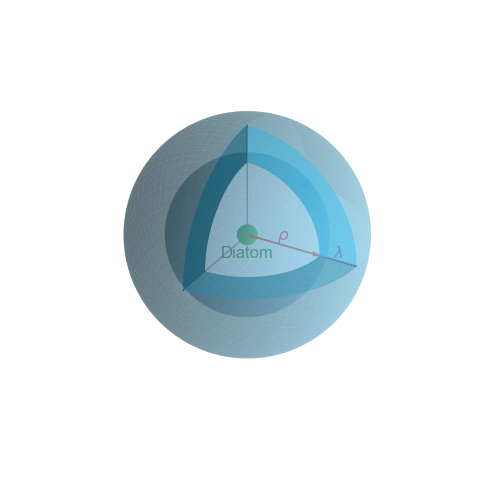

In [10]:
fig, ax = create_3D_figure()

# Diatom sphere
plot_theta_sphere(
    ax, Rd, np.pi,
    color='lime', linewidth=10, alpha=1,
    shade=True, zorder=3
    )
ax.text(
    0, 0, -3*Rd, 'Diatom',
    ha='center', va='bottom',
    color='darkgreen',
    )

# Inner shell
plot_7_8ths_sphere(
    ax, Ri,
    color='lightskyblue', linewidth=1, alpha=0.5
    )
# Cone
plot_cone(
    ax, [Ri, Ro], np.pi/2, [0, np.pi/2],
    color='deepskyblue', linewidth=1, alpha=0.8
    )
plot_plane(
    ax, [Ri, Ro], 0, [np.pi/2, np.pi],
    color='deepskyblue', linewidth=1, alpha=0.8
    )
plot_plane(
    ax, [Ri, Ro], np.pi/2, [np.pi/2, np.pi],
    color='deepskyblue', linewidth=1, alpha=0.8
    )
# Outside shell
plot_7_8ths_sphere(
    ax, Ro,
    color='skyblue', linewidth=1, alpha=0.5
    )

# ax.text(
#     0, 0, -1.5*Ro, 'Bacterial Spherical Shell',
#     ha='center', va='bottom',
#     color='black',
#     )

# Add the coordinate axes
add_xyz_axes(ax, Ro, line_width=1)

# Plot double arrows for shell's parameters
plot_length(ax,  0, Ri, '$\\rho$')
plot_length(ax, Ri, Ro, '$\\lambda$')

# Set an equal aspect ratio
ax.set_aspect('equal')

path = base.save(figures_path, 'scheme_diatom_spherical_shell', return_path=True)

crop_image(path, crop_percentage=0.2)

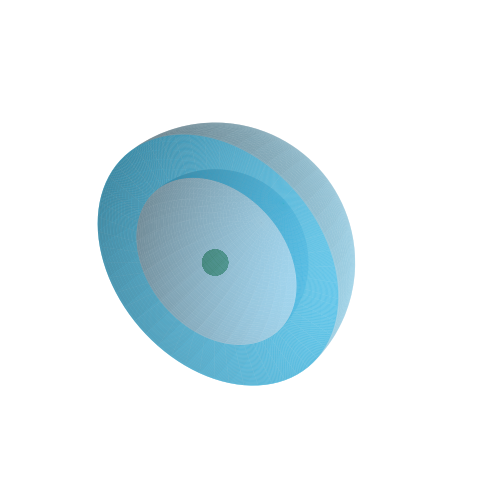

In [11]:
fig, ax = create_3D_figure()

# Diatom sphere
plot_theta_sphere(
    ax, Rd, np.pi,
    color='lime', linewidth=2, alpha=1,
    edgecolor='darkgreen', shade=True
    )
ax.scatter(
    0, 0, 0,
    color='limegreen', s=200, alpha=1,
    edgecolor='green', linewidth=1
    )

θmax = np.pi * 5 / 10
# Inner shell
plot_theta_sphere(
    ax, Ri, θmax,
    color='lightskyblue', linewidth=1, alpha=0.5
    )
# Cone
plot_cone(
    ax, [Ri, Ro], θmax,
    color='deepskyblue', linewidth=1, alpha=0.8
    )
# Outside shell
plot_theta_sphere(
    ax, Ro, θmax,
    color='skyblue', linewidth=1, alpha=0.5
    )

# Set an equal aspect ratio
ax.set_aspect('equal')